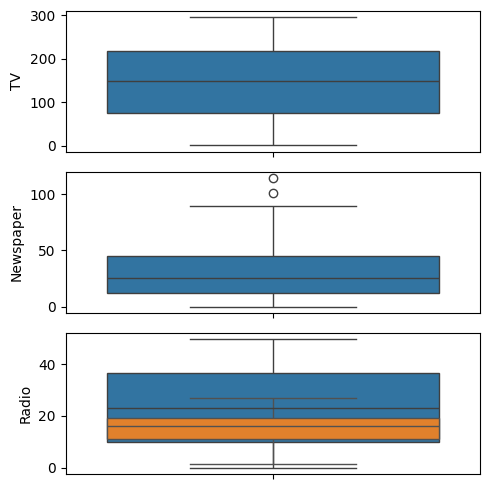

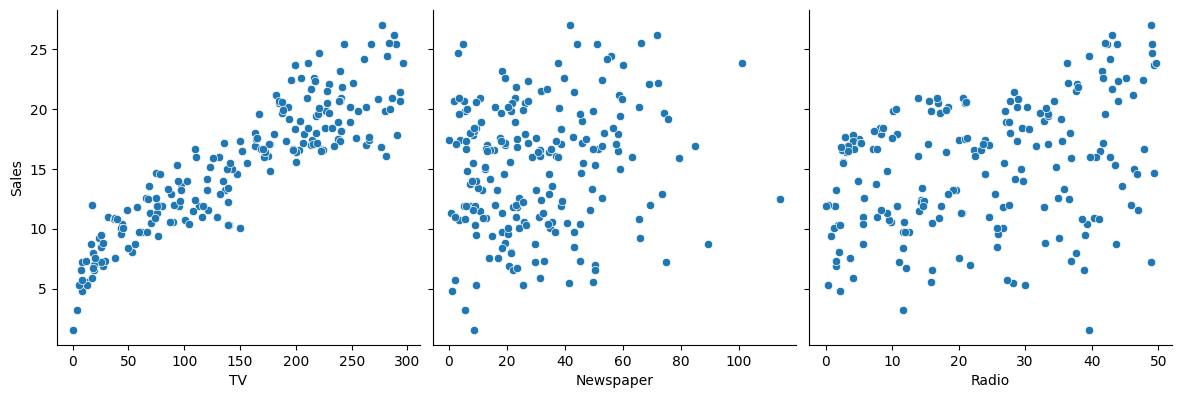

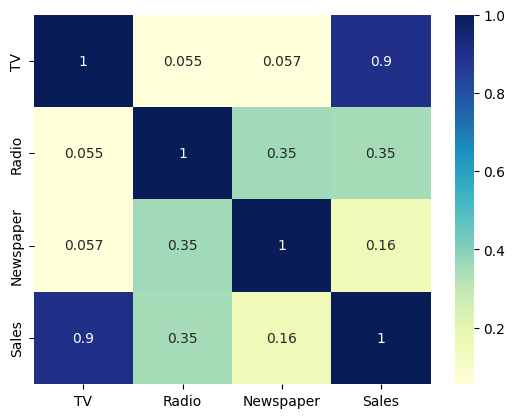

Coefficients:  [0.05565473]
Intercept:  6.9027
Sales = 6.9027 + 0.0557 × TV
mean_squared_error:  2.2564722695411


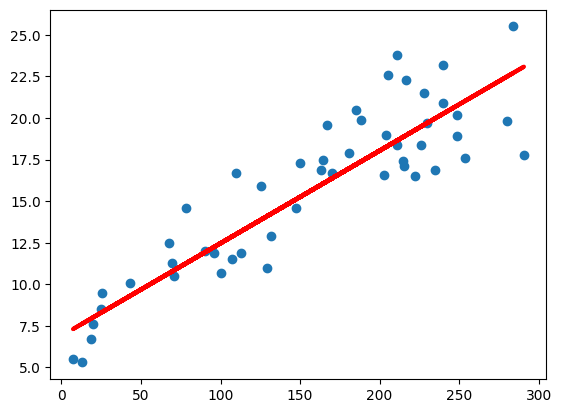

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Hiển thị dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns
"""# 1. Đọc dữ liệu"""
data_path ="https://raw.githubusercontent.com/ltdaovn/dataset/master/advertising.csv"

#loading the advertising dataset
data = pd.DataFrame(pd.read_csv(data_path))
#print(data)
data.describe()
#data.info()
"""# 2. Làm sạch dữ liệu"""
# Kiểm tra dữ liệu null
data.isnull().sum()*100/data.shape[0]
# Phát hiện dữ liệu ngoại lai (Outliers)
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()
"""# 3. Phân tích khám phá (Exploratory Data Analysis – EDA)"""
# Biến đầu ra (Sales)
sns.boxplot(data['Sales'])
plt.show()
# Tham khảo BoxPlot
# https://en.wikipedia.org/wiki/Box_plot
# Vẽ đồ thị phân tán (Scatter Plots) để phân tích mối quan hệ giữa biến đầu ra (Sales) với các biến đầu vào
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',
height=4, aspect=1, kind='scatter')
plt.show()
# Dùng heatmap để xem mối tương quan giữa các biến.
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()
"""Qua Heatmap và Scatter Plots, chúng ta thấy rằng biến TV có vẻ tương quan
nhất với Sales. Vì vậy, hãy tiếp tục và thực hiện hồi quy tuyến tính đơn giản
bằng cách sử dụng TV làm biến đầu vào.
# 4. Xây dựng mô hình hồi quy
"""
X = data[['TV']]
y = data['Sales']
# Chia thành 2 tập dữ liệu huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,test_size = 0.3, random_state = 100)
# Xây dựng mô hình hồi quy
linearreg = LinearRegression()
linearreg.fit(X_train, y_train)

# Tính độ chính xác của mô hình
y_predict = linearreg.predict(X_test) #making predictions based on the testing unit
print("Coefficients: ", linearreg.coef_)
print("Intercept: ", round(linearreg.intercept_,4))
print("Sales =", round(linearreg.intercept_,4), "+",
round(linearreg.coef_[0],4), "× TV")
print("mean_squared_error: ", np.sqrt(metrics.mean_squared_error(y_test,
y_predict))) #calculating the RMSE number
# Vẽ đường hồi quy trên tập dữ liệu huấn luyện
#plt.scatter(X_train, y_train)
#plt.plot(X_train, linearreg.predict(X_train), color='red', linewidth=3)
# Vẽ đường hồi quy trên tập dữ liệu kiểm tra
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predict, color='red', linewidth=3)